# Problem constants
- Medworld claim: 100mg medicine and 400gm of fillers in 500mg tablet with a variance 12.25 sq.mg or 3.5 mg standard deviation
- 50 randomly sampled data was taken

In [1]:
import pandas as pd
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean, pstdev, stdev
from typing import Tuple

# Read the data

In [2]:
df = pd.read_excel('is medworld cheating sample data.xlsx',header=None)
sample_values = df.values
sample_values = sample_values.flatten()
print('Below are the data of 50 random samples')
df

Below are the data of 50 random samples


,0,1,2,3,4,5,6,7,8,9
0,99.85,96.33,107.20,96.81,100.32,99.45,95.81,97.20,96.82,101.57
1,98.53,97.19,96.53,103.20,95.68,97.78,106.87,104.58,101.95,103.81
2,98.43,93.06,103.69,94.98,103.26,97.63,97.09,96.85,93.36,100.08
3,98.73,102.26,103.28,97.47,99.25,99.63,98.26,102.25,100.86,98.92
4,95.50,100.15,99.77,101.13,97.83,98.24,98.23,98.27,100.76,100.01


# Calculate sample mean and standard deviation
Below we calculate the mean and standard deviation of the samples taken

In [3]:
sample_mean = mean(sample_values)
sample_std_dev = stdev(sample_values)
print(f'sample_mean = {sample_mean} mg and sample standard deviation = {sample_std_dev} mg')

sample_mean = 99.3342 mg and sample standard deviation = 3.106956046929377 mg


# Compute normal distribution with sample mean and standard deviation
By central limit theorem:
1. population mean = sample mean
1. sample standard deviation = population standard deviation/sqrt(number of samples)

# Prepare a confidence interval visualization

In [4]:
def view_confidence_interval_t_dist(confidence_interval: float,
                                    number_of_samples:int,
                                    sample_mean: float,
                                    sample_std_dev: float
                                    ):
    # declaring problem constants
    x_bar = sample_mean # sample mean
    n = number_of_samples # number of samples taken
    degree_of_freedom = n-1
    s = sample_std_dev
    s_x_bar = s/n**0.5
    # generate x and y axes
    x_lower = x_bar-3.5*s_x_bar
    x_upper = x_bar+3.5*s_x_bar
    x = np.arange(x_lower,x_upper,(x_upper-x_lower)/1000)
    y = t.pdf(x,degree_of_freedom,loc=sample_mean,scale=s_x_bar)
    # get the probabilities of the tail areas
    tail_areas = (1-confidence_interval)/2
    upper_limit_prob = 1-tail_areas
    lower_limit_prob = tail_areas
    # compute the value of x_lower and x_higher
    x_lower = t.ppf(lower_limit_prob,degree_of_freedom,loc=sample_mean,scale=s_x_bar)
    x_higher = t.ppf(upper_limit_prob,degree_of_freedom,loc=sample_mean,scale=s_x_bar)
    # plot and shade the graphs
    plt.plot(x,y,'-')
    plt.fill_between(x[x>=x_lower],y[x>=x_lower],color='green',alpha=0.7)
    plt.fill_between(x[x>=x_higher],y[x>=x_higher],color='white')
    plt.draw()
    return round(x_lower,2), round(x_higher,2)

# Get a 95% confidence interval band

The mean medicine contents of a sample is expected to lie between 98.45mg and 100.22mg with 95.0% confidence
Margin of error = ±0.884999999999998mg


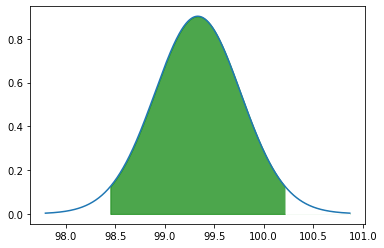

In [6]:
confidence_interval = 0.95
number_of_samples = len(sample_values)
sample_mean = sample_mean
sample_std_dev = sample_std_dev
x_lower, x_higher = view_confidence_interval_t_dist(confidence_interval,
                                                    number_of_samples,
                                                    sample_mean,
                                                    sample_std_dev
                                                    )
print(f'The mean medicine contents of a sample is expected to lie between {x_lower}mg '\
      f'and {x_higher}mg with {confidence_interval*100}% confidence')
print(u'Margin of error = \u00B1{}mg'.format((x_higher-x_lower)/2))

# Inference
Thus from the above sample collected the mean medicine content was found to be 99.3342 mg and with 95% confidence it is expected to lie between 98.45mg and 100.22mg. Thus we can say that 99.3342 mg lies within 95% confidence interval. Thus till now we cannot conclude Medworld is cheating.

# Optimum number of samples to punish Medworld
Below we will try to estimate what will be the optimum number of samples required considering confidence interval = 0.95 the same sample standard deviation estimate. We will take the approach of t-distribution iterative approach as population standard deviation we are assuming to be unknown. <br>
The desired margin of error should be ±0.5mg instead of the previous ±0.885mg

In [12]:
def iterate_over_sample_sizes(n: int,
                              confidence_interval: float,
                              sample_std_dev: float,
                              dmoe: float
                             ):
    degree_of_freedom = n-1
    # calculate the t value for the given confidence interval and degree of freedom
    alpha = (1+confidence_interval)/2
    t_value = t.ppf(alpha, degree_of_freedom,loc=0,scale=1)
    # calculate the dmoe for the given t value.
    dmoe_calc = (sample_std_dev/n**0.5)*t_value
    # check whether the dmoe calculated is around desired dmoe.
    if dmoe - 0.01*dmoe <= dmoe_calc <= dmoe + 0.01*dmoe:
        print(u'For the given condition, {} minimum number of samples required to get a CI: {} and DMOE: \u00B1{}'.format(n,confidence_interval,dmoe))
        return n
    else:
        # if we are getting a positive deviation from desired DMOE, increase number of samples
        if dmoe_calc > dmoe:
            sample_size_change = 1
        else:
            # if we are getting a negative deviation from desired DMOE, decrease number of samples
            sample_size_change = -1
        # iteration with change in sample size
        iterate_over_sample_sizes(n+sample_size_change,
                                  confidence_interval,
                                  sample_std_dev,
                                  dmoe
                                 )

In [13]:
confidence_interval = 0.95
number_of_samples = 10 # pilot sample
sample_std_dev = sample_std_dev
dmoe = 0.5
min_number_of_samples = iterate_over_sample_sizes(n=number_of_samples,
                                                  confidence_interval=confidence_interval,
                                                  sample_std_dev=sample_std_dev,
                                                  dmoe=dmoe
                                                 )

For the given condition, 148 minimum number of samples required to get a CI: 0.95 and DMOE: ±0.5


# Inference
If the guideline says that ±0.5mg deviation can cause trouble to patients then we have not got enough samples to prove MedWorld cheating. We require more sample to bring our DMOE down. Let's see for getting the same DMOE as per mean and standard deviation prescribed by MedWorld how many samples are required.

In [14]:
def minimum_samples(confidence_interval:float,
                    population_std_dev: float,
                    dmoe: float
                   ):
    prob_upper = (1+confidence_interval)/2
    prob_lower = (1-confidence_interval)/2
    z_upper = norm.ppf(prob_upper, loc=0, scale=1)
    z_lower = norm.ppf(prob_lower, loc=0, scale=1)
    min_samples = (population_std_dev*(z_upper - z_lower)/(2*dmoe))**2
    return int(round(min_samples,0))

In [15]:
confidence_interval:float = 0.95
population_std_dev: float = 3.5
dmoe: float = 0.5
min_samples = minimum_samples(confidence_interval, population_std_dev, dmoe)
print('For {}% confidence, with a population std. dev: {} and dmoe: {}, {} minimum samples are required'.format(confidence_interval*100,population_std_dev,dmoe,min_samples))

For 95.0% confidence, with a population std. dev: 3.5 and dmoe: 0.5, 188 minimum samples are required
